In [2]:
# Load libraries
import pandas as pd
import time
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('cleandataset.csv',header=None)

In [3]:
print("No.of row*coulmns {}".format(df.shape))

No.of row*coulmns (681, 17)


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,NaN,0,1.00,2.00,3,4,5,6,7.00,8,9,10,11,12,13,14,15
1,0.0,1,30.83,0.00,1,0,12,7,1.25,1,1,1,0,0,202,0,0
2,1.0,0,58.67,4.46,1,0,10,3,3.04,1,1,6,0,0,43,560,0
3,2.0,0,24.50,0.50,1,0,10,3,1.50,1,0,0,0,0,280,824,0
4,3.0,1,27.83,1.54,1,0,12,7,3.75,1,1,5,1,0,100,3,0


In [19]:
df = df.iloc[:,1:] # drop first row of index values
df = df.sample(frac=1) # shuffle rows
df.head()

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
416,38.42,0.705,1,0,1,7,0.375,0,1,2,0,0,225,500,1
497,64.08,0.165,1,0,5,2,0.000,1,1,1,0,0,232,100,0
530,33.92,1.585,2,2,5,2,0.000,1,0,0,0,0,320,0,1
271,18.08,6.750,2,2,9,7,0.040,0,0,0,0,0,140,0,1
158,68.67,15.000,1,0,4,8,0.000,1,1,14,0,0,0,3376,0


In [20]:
# split data into its X and y components
X, y = df.values[:,:-1], df.values[:,-1]

In [21]:
#As we dont have unseen data splitting the given data into train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.33,random_state=42)

In [22]:
#We will use 10-fold cross validation to estimate accuracy.
#This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [23]:
#We don’t know which algorithms would be good on this problem or what configurations to use. 
#Evaluation algorithms
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC', RandomForestClassifier(n_estimators=50)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    #we get bias with mean/average and variance with standard deviation
    #lower mean value, better value

LR: 0.859807 (0.046605)
LDA: 0.870531 (0.051278)
KNN: 0.660338 (0.071912)
CART: 0.844541 (0.052252)
NB: 0.791884 (0.058639)
SVM: 0.546087 (0.051273)
RFC: 0.885990 (0.043668)


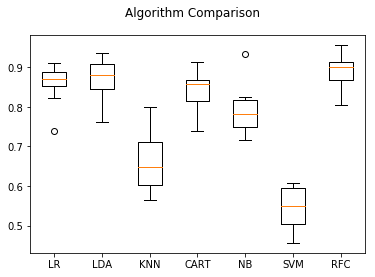

In [24]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [25]:
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(X_train,y_train)

c:\users\rishi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\rishi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
#predictions logreg
predictions = logreg.predict(X_test)

# Get the accuracy score of logreg model and print it

print("Accuracy of logistic regression classifier:",accuracy_score(y_test, predictions))
print("\n Confusion matrix as follows: \n",confusion_matrix(y_test,predictions))
print("\n Classification report as follows: \n",classification_report(y_test, predictions))

Accuracy of logistic regression classifier: 0.8488888888888889

 Confusion matrix as follows: 
 [[ 87  10]
 [ 24 104]]

 Classification report as follows: 
               precision    recall  f1-score   support

         0.0       0.78      0.90      0.84        97
         1.0       0.91      0.81      0.86       128

   micro avg       0.85      0.85      0.85       225
   macro avg       0.85      0.85      0.85       225
weighted avg       0.86      0.85      0.85       225



In [27]:
# Define the grid of values for tol and max_iter
#tol = tolerance(stopping criteria)
tol = [0.01,0.001,0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)


In [28]:
# # Instantiate GridSearchCV with the required parameters
# grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# # Fit data to grid_model
# grid_model_result = grid_model.fit(X_train, y_train)

# # Summarize results
# best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
# print("Best: %f using %s" % (best_score, best_params))

In [29]:
#best accuracy - best hyper parameters selection for train data set

random = RandomizedSearchCV(estimator=logreg, param_distributions=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
random_result = random.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.857456 using {'tol': 0.0001, 'max_iter': 100}
Execution time: 0.1723031997680664 ms


c:\users\rishi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
c:\users\rishi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
c:\users\rishi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\rishi\appdata\local\programs\python\pytho

In [30]:
#best accuracy - best hyper parameters selection for test data set
random = RandomizedSearchCV(estimator=logreg, param_distributions=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
random_result = random.fit(X_test, y_test)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.844444 using {'tol': 0.001, 'max_iter': 100}
Execution time: 0.09047865867614746 ms


c:\users\rishi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
c:\users\rishi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\rishi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
# Instantiate a SVM with default parameter values
svm_clf = SVC(kernel='linear')

# Fit svm_clf to the train set
svm_clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [32]:
#predictions svm
predictions = svm_clf.predict(X_test)

# Get the accuracy score of logreg model and print it

print("Accuracy of logistic regression classifier:",accuracy_score(y_test, predictions))
print("\n Confusion matrix as follows: \n",confusion_matrix(y_test,predictions))
print("\n Classification report as follows: \n",classification_report(y_test, predictions))

Accuracy of logistic regression classifier: 0.8355555555555556

 Confusion matrix as follows: 
 [[90  7]
 [30 98]]

 Classification report as follows: 
               precision    recall  f1-score   support

         0.0       0.75      0.93      0.83        97
         1.0       0.93      0.77      0.84       128

   micro avg       0.84      0.84      0.84       225
   macro avg       0.84      0.85      0.84       225
weighted avg       0.85      0.84      0.84       225

